<h1> Mental Health Treatment Predictor </h1>

A mental health treatment predictor that predicts whether a person is going to sought treatment for a mental health condition based on the environment of their workplace, as well as their countries overall happiness score and other measures.

Datasets used in this notebook includes the Mental Health in Tech Survey <sup>1</sup> that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace,  and the World Happiness Report <sup>2</sup> (2015), that uses GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption to measure the happiness score per country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Datasets </h2>

<h3> Survey </h3>

In [2]:
survey = pd.read_csv('survey.csv')

In [3]:
survey

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [5]:
description = """
This dataset contains the following data: 

Timestamp 

Age 

Gender 

Country 

state: If you live in the United States, which state or territory do you live in? 

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness? 

treatment: Have you sought treatment for a mental health condition? 

work_interfere: If you have a mental health condition, do you feel that it interferes with your work? 

no_employees: How many employees does your company or organization have? 

remote_work: Do you work remotely (outside of an office) at least 50% of the time? 

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits? 

care_options: Do you know the options for mental health care your employer provides? 

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? 

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? 

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? 

leave: How easy is it for you to take medical leave for a mental health condition? 

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences? 

coworkers: Would you be willing to discuss a mental health issue with your coworkers? 

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)? 

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview? 

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview? 

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health? 

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments"""

print(description)


This dataset contains the following data: 

Timestamp 

Age 

Gender 

Country 

state: If you live in the United States, which state or territory do you live in? 

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness? 

treatment: Have you sought treatment for a mental health condition? 

work_interfere: If you have a mental health condition, do you feel that it interferes with your work? 

no_employees: How many employees does your company or organization have? 

remote_work: Do you work remotely (outside of an office) at least 50% of the time? 

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits? 

care_options: Do you know the options for mental health care your employer provides? 

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? 

seek_help: Does your employer provide resources to learn more abou

In [6]:
survey.drop(['Timestamp', 'state', 'comments'], axis=1, inplace=True)

In [7]:
survey

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [8]:
survey['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [9]:
survey['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [10]:
survey['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [11]:
survey['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Man                                                 2
Cis Male                                            2
Female                                              2
maile                                               1
All                                                 1
Enby                                                1
Trans-female                

In [12]:
def cleanGender(df):
    if (df['Gender'].lower()[0] == 'f') or (df['Gender'].lower()[0] == 'w') or ('female' in df['Gender'].lower()) \
    or ('she' in df['Gender'].lower()):
        df['Gender'] = 'Female'
    else:
        df['Gender'] = 'Male'
    return df

In [13]:
survey = survey.apply(cleanGender, axis=1)

In [14]:
survey.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [15]:
survey['Gender'].value_counts()

Male      1007
Female     252
Name: Gender, dtype: int64

In [16]:
survey['work_interfere'].fillna('Never', inplace=True)
survey['self_employed'].fillna('No', inplace=True)

In [17]:
survey.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [18]:
survey.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


As you can see, age is heavily skewed

In [19]:
survey['Age'].dtype

dtype('int64')

In [20]:
survey['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [21]:
survey.drop(survey[(survey['Age']<10) | (survey['Age']>110)].index, axis=0, inplace=True)

In [22]:
survey.describe()

,Age
count,1252.000000
mean,32.059904
std,7.309669
min,11.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [23]:
survey.shape

(1252, 24)

<h4> Data Visualization </h4>

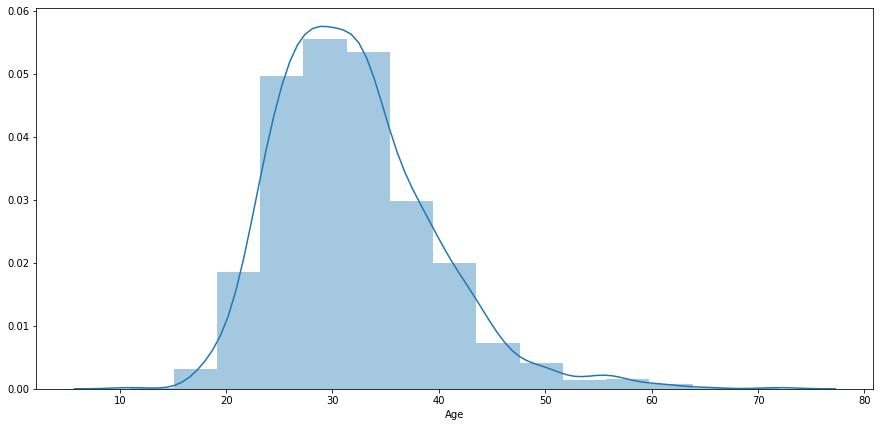

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(survey['Age'], bins=15)

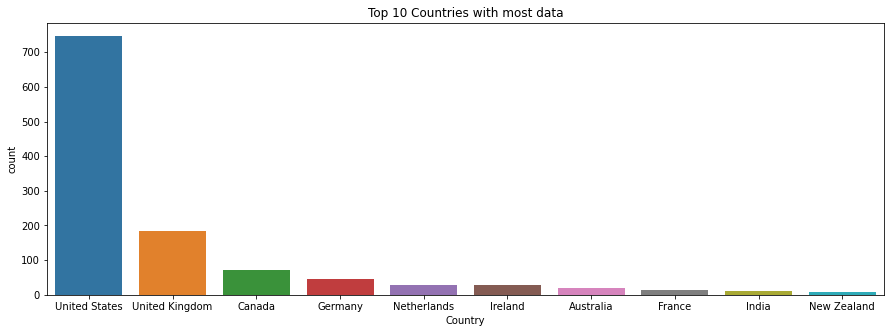

In [25]:
plt.figure(figsize=(15,5))
plt.title('Top 10 Countries with most data')
sns.countplot(data=survey, x='Country', order=survey.Country.value_counts().iloc[:10].index)

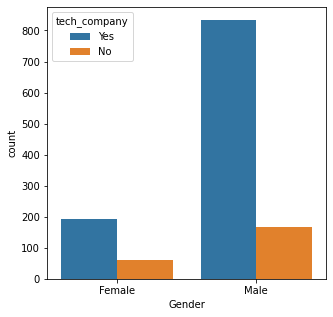

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(data=survey, x='Gender', hue='tech_company')

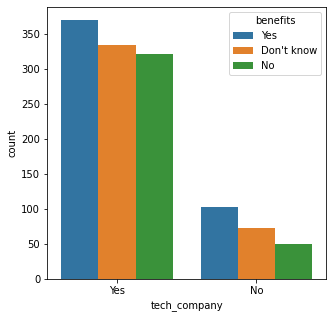

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(data=survey, x='tech_company', hue='benefits')

Obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
Supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s) 



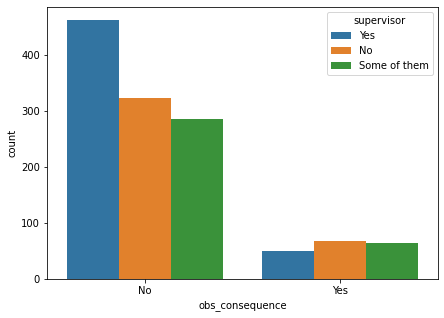

In [28]:
print('Obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')
print('Supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s) \n')
plt.figure(figsize=(7,5))
sns.countplot(data=survey, x='obs_consequence', hue='supervisor')

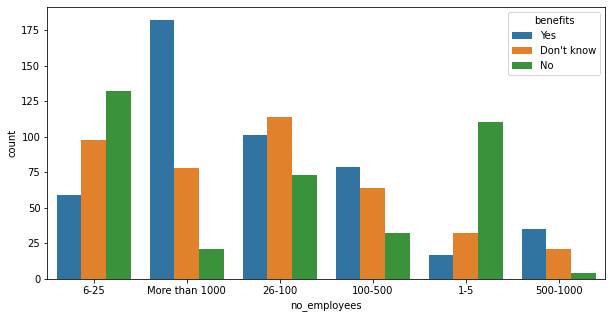

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=survey, x='no_employees', hue='benefits')

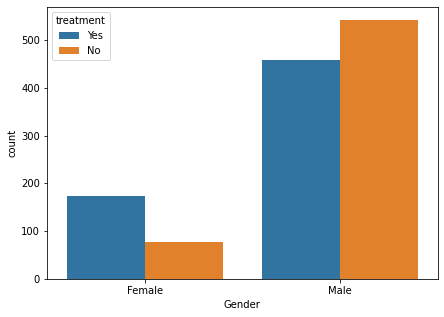

In [30]:
plt.figure(figsize=(7,5))
sns.countplot(data = survey, x='Gender', hue='treatment')

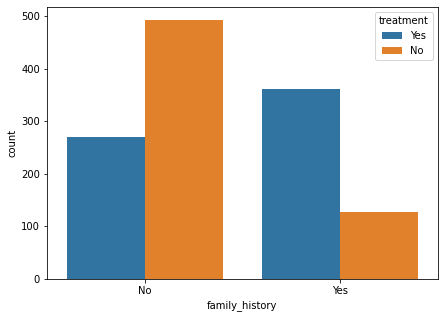

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(data=survey, x='family_history', hue='treatment')

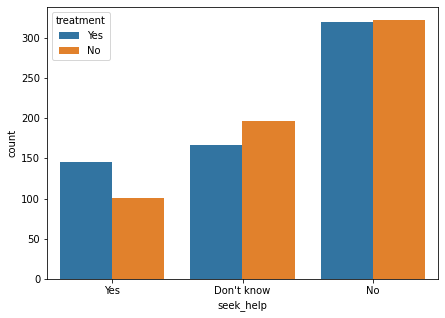

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(data=survey, x='seek_help', hue='treatment')

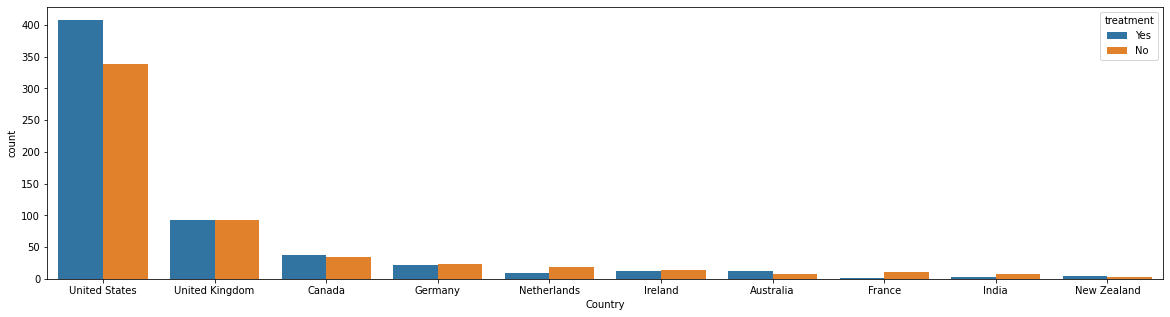

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(data=survey, x='Country', hue='treatment', order=survey.Country.value_counts().iloc[:10].index)

<h3> Happiness </h3>

In [34]:
happiness = pd.read_csv('2015.csv')

In [35]:
happiness.shape

(158, 12)

In [36]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [37]:
happiness.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [38]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [39]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [40]:
happiness.drop(['Dystopia Residual', 'Standard Error'], axis=1, inplace=True)

<h4> Exploratory Data Analysis </h4>

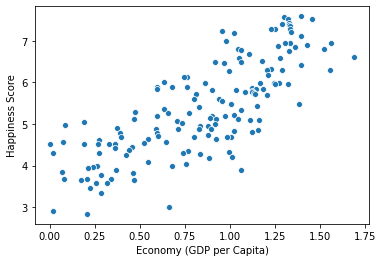

In [41]:
sns.scatterplot(data=happiness, x='Economy (GDP per Capita)', y='Happiness Score')

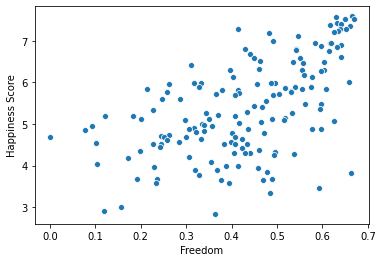

In [42]:
sns.scatterplot(data=happiness, x='Freedom', y='Happiness Score')

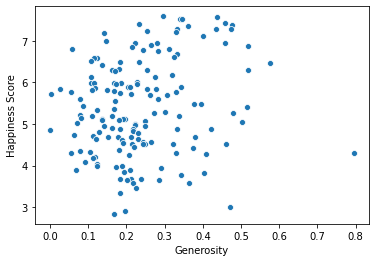

In [43]:
sns.scatterplot(data=happiness, x='Generosity', y='Happiness Score')

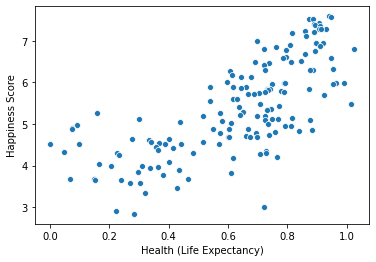

In [44]:
sns.scatterplot(data=happiness, x='Health (Life Expectancy)', y='Happiness Score')

In [45]:
happiness.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

In [46]:
happiness.groupby('Region')['Economy (GDP per Capita)'].mean().sort_values(ascending=False)

Region
North America                      1.360400
Western Europe                     1.298596
Australia and New Zealand          1.291880
Eastern Asia                       1.151780
Middle East and Northern Africa    1.066973
Central and Eastern Europe         0.942438
Latin America and Caribbean        0.876815
Southeastern Asia                  0.789054
Southern Asia                      0.560486
Sub-Saharan Africa                 0.380473
Name: Economy (GDP per Capita), dtype: float64

<h3> Merge Datasets</h3>

In [47]:
happiness['Country'].nunique()

158

In [48]:
survey['Country'].nunique()

46

In [49]:
df = pd.merge(survey, happiness, how='left', on='Country')

In [50]:
df.isna().sum()

Age                              0
Gender                           0
Country                          0
self_employed                    0
family_history                   0
treatment                        0
work_interfere                   0
no_employees                     0
remote_work                      0
tech_company                     0
benefits                         0
care_options                     0
wellness_program                 0
seek_help                        0
anonymity                        0
leave                            0
mental_health_consequence        0
phys_health_consequence          0
coworkers                        0
supervisor                       0
mental_health_interview          0
phys_health_interview            0
mental_vs_physical               0
obs_consequence                  0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family              

In [51]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,obs_consequence,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,No,North America,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,No,North America,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,No,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,Yes,Western Europe,21,6.867,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,No,North America,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105


<h2> Classifier </h2>

<h3> One Hot Encoding </h3>

In [52]:
df.drop('Region', axis=1, inplace=True)

In [53]:
numerical_columns = df._get_numeric_data().columns

In [54]:
categorical_columns = []
for col in df.columns:
    if col not in numerical_columns:
        categorical_columns.append(col)

In [55]:
one_hot_encoded_df = pd.DataFrame()

for col in categorical_columns:
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, 
                                    pd.get_dummies(df[col], 
                                                   drop_first=True).add_prefix(col + ' - ')], 
                                   axis=1)

In [56]:
one_hot_encoded_df

,Gender - Male,Country - Austria,Country - Belgium,Country - Bosnia and Herzegovina,Country - Brazil,Country - Bulgaria,Country - Canada,Country - China,Country - Colombia,Country - Costa Rica,...,coworkers - Yes,supervisor - Some of them,supervisor - Yes,mental_health_interview - No,mental_health_interview - Yes,phys_health_interview - No,phys_health_interview - Yes,mental_vs_physical - No,mental_vs_physical - Yes,obs_consequence - Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1248,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
1249,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [57]:
df = pd.concat([df.drop(categorical_columns, axis=1), one_hot_encoded_df], axis=1)

<h3> Neural Network </h3>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
df.columns

Index(['Age', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Gender - Male',
       'Country - Austria', 'Country - Belgium',
       'Country - Bosnia and Herzegovina', 'Country - Brazil',
       'Country - Bulgaria', 'Country - Canada', 'Country - China',
       'Country - Colombia', 'Country - Costa Rica', 'Country - Croatia',
       'Country - Czech Republic', 'Country - Denmark', 'Country - Finland',
       'Country - France', 'Country - Georgia', 'Country - Germany',
       'Country - Greece', 'Country - Hungary', 'Country - India',
       'Country - Ireland', 'Country - Israel', 'Country - Italy',
       'Country - Japan', 'Country - Latvia', 'Country - Mexico',
       'Country - Moldova', 'Country - Netherlands', 'Country - New Zealand',
       'Country - Nigeria', 'Country - Norway', 'Country - Philippines',
       'Country - Poland', 'Country - Portu

In [60]:
X = df.drop('treatment - Yes', axis=1).values

In [61]:
y = df['treatment - Yes'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
scaler = MinMaxScaler()

In [64]:
X_train = scaler.fit_transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
X_train.shape

(876, 96)

In [67]:
model = Sequential()

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

To prevent overfitting, use early stop

In [68]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [69]:
model.fit(x=X_train, y=y_train, epochs=15, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 876 samples, validate on 376 samples
Epoch 1/15
876/876 [==============================] - 1s 818us/sample - loss: 0.6756 - val_loss: 0.6308
Epoch 2/15
876/876 [==============================] - 0s 79us/sample - loss: 0.6173 - val_loss: 0.5552
Epoch 3/15
876/876 [==============================] - 0s 60us/sample - loss: 0.5346 - val_loss: 0.4906
Epoch 4/15
876/876 [==============================] - 0s 58us/sample - loss: 0.4923 - val_loss: 0.4564
Epoch 5/15
876/876 [==============================] - 0s 60us/sample - loss: 0.4449 - val_loss: 0.4350
Epoch 6/15
876/876 [==============================] - 0s 65us/sample - loss: 0.4398 - val_loss: 0.4245
Epoch 7/15
876/876 [==============================] - 0s 62us/sample - loss: 0.4109 - val_loss: 0.4220
Epoch 8/15
876/876 [==============================] - 0s 58us/sample - loss: 0.3864 - val_loss: 0.4157
Epoch 9/15
876/876 [==============================] - 0s 59us/sample - loss: 0.3854 - val_loss: 0.4211
Epoch 00009: early stoppin

In [70]:
losses = pd.DataFrame(model.history.history)

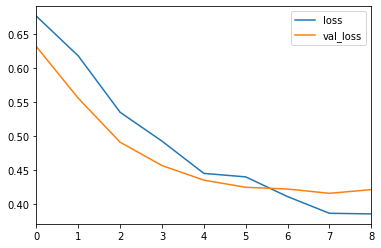

In [71]:
losses.plot()

In [72]:
predictions = model.predict_classes(X_test)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       173
           1       0.81      0.89      0.85       203

    accuracy                           0.83       376
   macro avg       0.83      0.82      0.82       376
weighted avg       0.83      0.83      0.83       376



In [74]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[130  43]
 [ 22 181]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

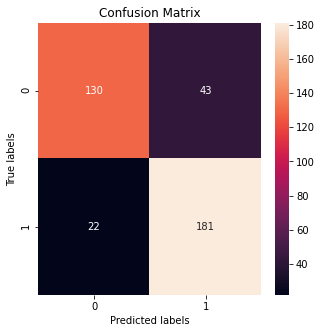

In [75]:
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

To check if the dataset was balanced

In [76]:
df['treatment - Yes'].value_counts()

1    632
0    620
Name: treatment - Yes, dtype: int64

<h2> References </h2>

1. Survey data taken from: https://www.kaggle.com/osmi/mental-health-in-tech-survey

2. Happiness data taken from: https://www.kaggle.com/unsdsn/world-happiness